Reuben Feinman

Math Tools for Neural and Cog. Sci.

Homework #4

11/2/17

# Problem #1

## (a)

Let $B$ denote the case that Mom's second gene is the dominant brown-eyed gene, and $b$ the case that it is the recessive blue-eyed gene. We are given the prior probabilities $P(B) = P(b) = \frac{1}{2}$. Given our observation, $O$, that the child has brown eyes, we can define the conditional probabilities of this observation for each case of Mom as follows (using understanding of genetics):

$P(O|B) = 1$

$P(O|b) = \frac{1}{2}$

Now, what we ultimately want to compute is $P(O|b)$. To do this, we use Baye's Rule:

$P(b|O) = \frac{P(O|b)*P(b)}{P(O)} = \frac{P(O|b)*P(b)}{P(O|b)*P(b) + P(O|B)*P(B)} 
= \frac{\frac{1}{2}*\frac{1}{2}}{\frac{1}{2}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$

So the probability is $\frac{1}{3}$.

## (b)

Now we have two observations, $O_1, O_2$. Assuming that these two events are conditionally independent (this would be the case in biology), we can compute our joint conditional probabilities as follows:

$P(O_1, O_2|B) = P(O_1|B)*P(O_2|B) = 1*1 = 1$

$P(O_1, O_2|b) = P(O_1|b)*P(O_2|b) = \frac{1}{2}*\frac{1}{2} = \frac{1}{4}$

We can use Baye's Rule to compute $P(b|O_1,O_2)$:

$P(b|O_1,O_2) = \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2)} 
= \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2|b)*P(b) + P(O_1,O_2|B)*P(B)} 
= \frac{\frac{1}{4}*\frac{1}{2}}{\frac{1}{4}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{8}}{\frac{5}{8}}
= \frac{1}{5}$.

So the probability is $\frac{1}{5}$.

## (c)

Extending upon the generalization we made to get from (a) to (b) above, we get an equation for our target probability as follows:
$
P(b|O_1, ..., O_N) = \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N)} 
= \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N|b)*P(b) + P(O_1, ..., O_N|B)*P(B)}
= \frac{P(O|b)^N*P(b)}{P(O|b)^N*P(b) + P(O|B)^N*P(B)}
= \frac{(\frac{1}{2})^N*\frac{1}{2}}{(\frac{1}{2})^N*\frac{1}{2} + (1)^N*\frac{1}{2}} 
= \frac{\frac{1}{2^{N+1}}}{\frac{1}{2^{N+1}} + \frac{1}{2}}
= \frac{1}{2^N + 1}
$

So the probability is $\frac{1}{2^N + 1}$.

# Problem #2

In [8]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
np.random.seed(0)

## (a)

In [1]:
def randp(p, num):
    # Values contains the set of 10 values we will sample from
    values = np.arange(1, len(p)+1)
    # Iterate 'num' times, sampling from values each time using the 
    # discrete probability vector provided
    samples = [np.random.choice(values, p=p) for _ in range(num)]
    
    return np.asarray(samples)

In [134]:
# set p values so they are all equal, at 1/10 each.
p = np.ones(10)/10
samples = randp(p, 1000)

In [138]:
from collections import Counter

def histogram_discrete(samples, title=None):
    """
    A function that takes an array of categorical samples
    and plots a histogram showing the frequency of each
    category in the array.
    """
    counts = Counter(samples)
    values = list(counts.keys())
    frequencies = list(counts.values())
    plt.figure(figsize=(8, 6))
    plt.bar(values, frequencies)
    plt.xticks(values)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()
    
def histogram_continuous(samples, title=None, nbins=10):
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()

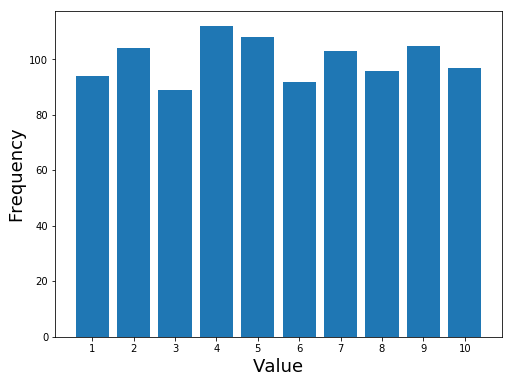

In [135]:
histogram_discrete(samples)

The bars look to be about equal height, which is what we'd expect given our p vector which assigns equal probability to each value.

## (b)

In [ ]:
# TODO!

In [78]:
p = np.arange(1,7)
p = p/np.sum(p)
samples_p = randp(p, 1000)
samples_q = randp(p, 1000)

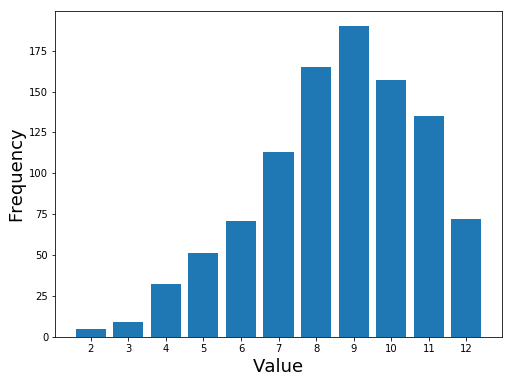

In [104]:
histogram_discrete(samples_p + samples_q)

In [93]:
def psum(p, q):
    samples_p = randp(p, 1000)
    samples_q = randp(q, 1000)
    counts = Counter(samples_p + samples_q)
    values = list(counts.keys())
    frequencies = list(counts.values())
    counts = sorted(zip(values, frequencies), key=lambda x: x[0])
    values = [val for val, freq in counts]
    frequencies = [freq for val, freq in counts]
    print(values)
    print(frequencies)

# Problem #3

## (a)

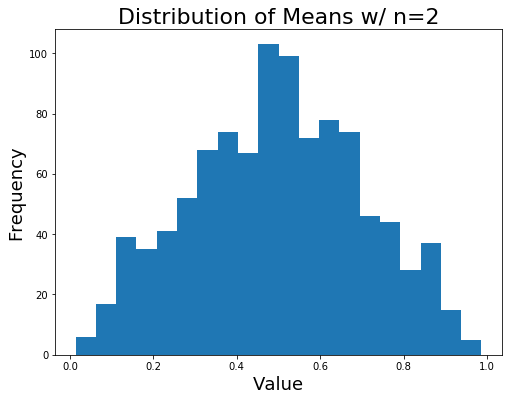

In [146]:
# Try it first with 1000 samples

# Sample 2 values from uniform(0,1) 1000 times 
samples = np.random.uniform(size=(1000, 2))
# Compute the mean of the 2 values for each of our 1000 trials
means = samples.mean(axis=1)
# Plot histogram of these 1000 means
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

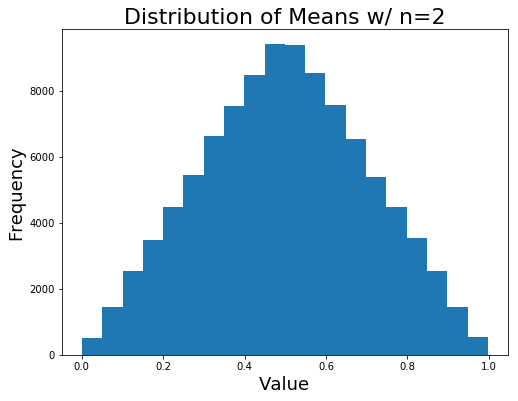

In [147]:
# Try it again with 100,000 samples
samples = np.random.uniform(size=(100000, 2))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

This distribution has a pyramid-like shape. It's basically an upside-down V. Since $n$ is very small here ($n=2$), we have not quite converged to the Gaussian distribution yet, and hence we get these rigid-looking edges.

## (b)

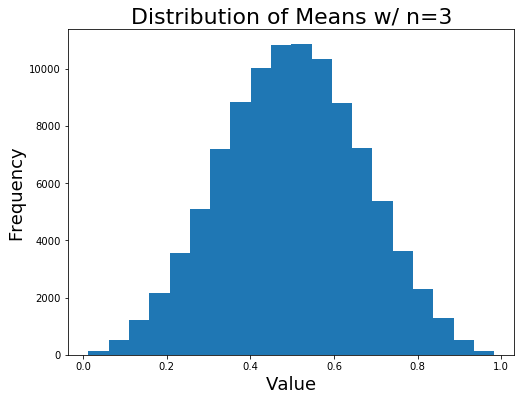

In [148]:
# Try n=3
samples = np.random.uniform(size=(100000, 3))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=3")

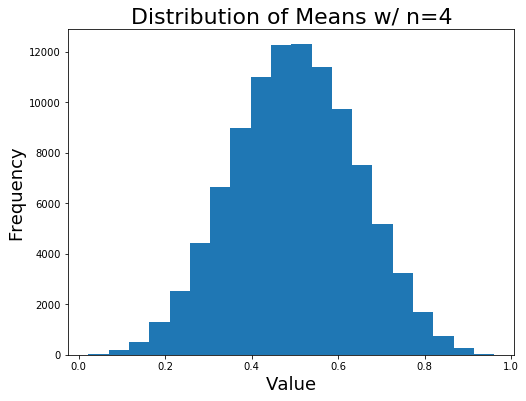

In [149]:
# Try n=4
samples = np.random.uniform(size=(100000, 4))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=4")

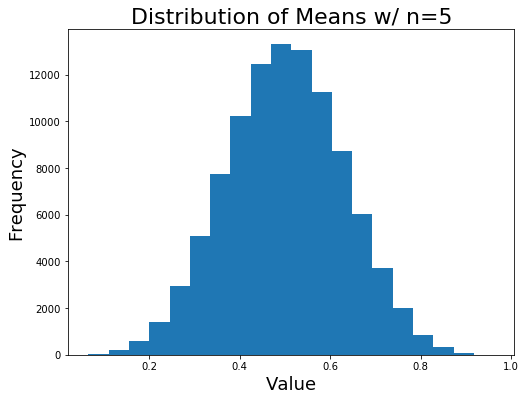

In [150]:
# Try n=5
samples = np.random.uniform(size=(100000, 5))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=5")

The edges of the pyramid have started caving inward, making the curve look less like a pyramid and more like our Gaussian distribution. The curve starts looking normal around n=4.

## (c)

## (d)